<a href="https://colab.research.google.com/github/SebastienLiger/Portfolio-Finance/blob/Finance/Delta_Airlines_valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
pip install alpha_vantage

In [22]:
pip install pandas_datareader

In [23]:

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from alpha_vantage.timeseries import TimeSeries

In [24]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Configuration
config = {
    "alpha_vantage": {
        "api_key": "BXQJSKCDRUGOG08Z",
        "symbol": "DAL",
        "outputsize": "full"
    },
    "plots": {
        "xticks_interval": 90,  # show a date every 90 days
        "color_actual": "#001f3f"
    }
}

def download_data(config):
    ts = TimeSeries(key=config["alpha_vantage"]["api_key"])
    data, _ = ts.get_daily(symbol=config["alpha_vantage"]["symbol"], outputsize=config["alpha_vantage"]["outputsize"])

    # Prepare data
    dates = list(data.keys())
    dates.reverse()  # Oldest to newest

    close_prices = [float(data[date]['4. close']) for date in dates]
    close_prices = np.array(close_prices)

    num_data_points = len(dates)
    display_date_range = f"from {dates[0]} to {dates[-1]}"
    print(f"Number of data points: {num_data_points}, {display_date_range}")

    return dates, close_prices

# Téléchargement des données
data_date, data_close_price = download_data(config)

# Conversion des dates pour le traçage
data_date = pd.to_datetime(data_date)

# Création d'un DataFrame à partir des dates et des prix de clôture
data_df = pd.DataFrame({
    'Date': data_date,  # Utilisation de data_date convertie en datetime
    'Close Price': data_close_price  # Utilisation de data_close_price pour les prix de clôture
})

Number of data points: 4247, from 2007-05-03 to 2024-03-15


[*********************100%%**********************]  1 of 1 completed


Variance: 0.0011
Volatility (Annualized Standard Deviation): 3.28%
Total return: 86.97%
Annualized Return: 3.82%


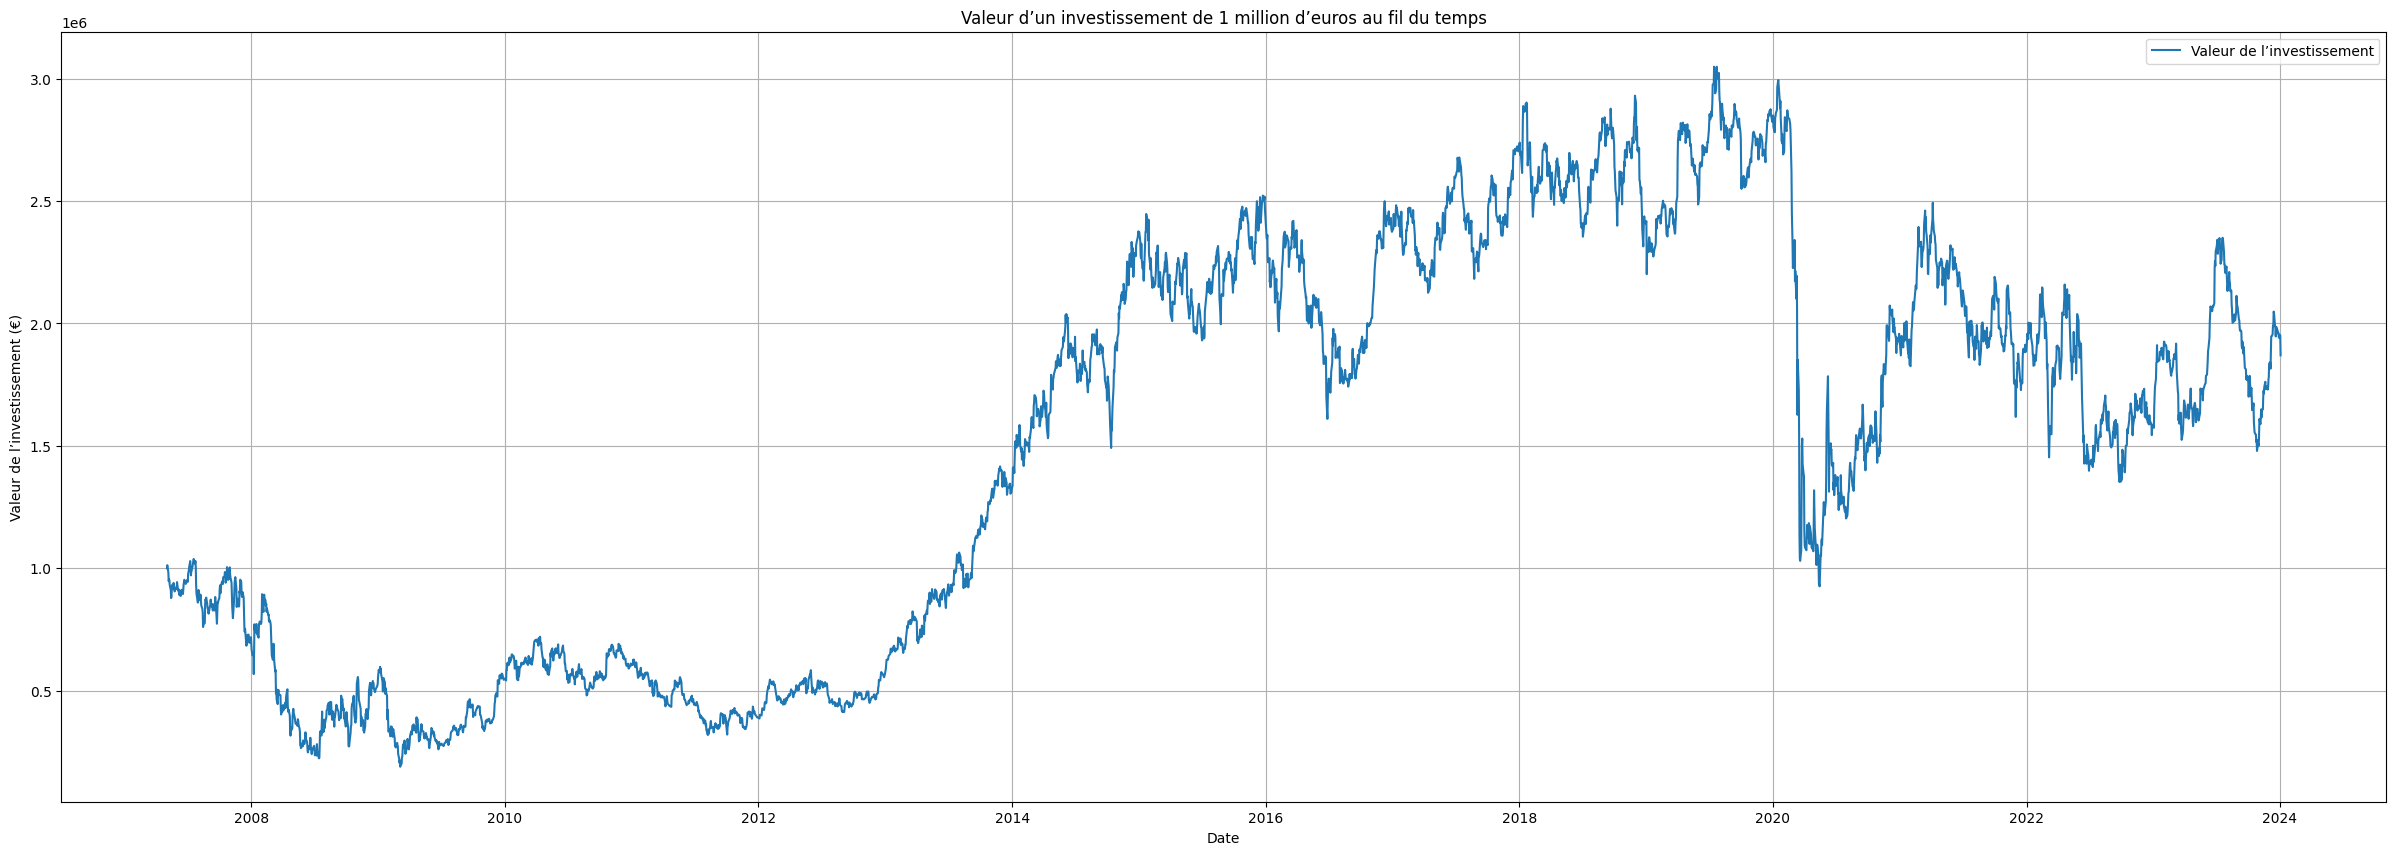

In [25]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

symbol = "DAL"
stock_data = yf.download(symbol, start='1980-01-01', end='2024-01-04')

# Supposons que vous voulez travailler avec les prix de clôture
df = stock_data[['Close']].copy()
df.rename(columns={'Close': 'Close Price'}, inplace=True)

# Calcul des rendements quotidiens
df['Daily Returns'] = df['Close Price'].pct_change()

# Calcul du rendement entre les deux périodes
total_return = (df['Close Price'].iloc[-1] / df['Close Price'].iloc[0]) - 1

# Calcul de l'annualized return
days = (df.index[-1] - df.index[0]).days
annualized_return = (1 + total_return) ** (365/days) - 1

# Calculer le rendement quotidien
df['Daily Returns'] = df['Close Price'].pct_change()

# Calculer le rendement moyen
mean_return = df['Daily Returns'].mean()

# Calculer la variance
variance = ((df['Daily Returns'] - mean_return) ** 2).mean()

# Calculer l'écart-type (volatilité)
volatility = np.sqrt(variance)*100

# Affichage des résultats
print(f"Variance: {variance:.4f}")
print(f"Volatility (Annualized Standard Deviation): {volatility:.2f}%")
print(f"Total return: {total_return*100:.2f}%")
print(f"Annualized Return: {annualized_return*100:.2f}%")

# Prix de clôture du premier jour de cotation
first_day_close_price = df['Close Price'].iloc[0]

# Nombre d'actions achetées avec 1 million d'euros
number_of_shares = 1000000 / first_day_close_price

# Calculer la valeur de l'investissement sur la période
df['Investment Value'] = number_of_shares * df['Close Price']

# Tracer la valeur de l'investissement au fil du temps
plt.figure(figsize=(30, 10))
plt.plot(df.index, df['Investment Value'], label='Valeur de l’investissement')
plt.title('Valeur d’un investissement de 1 million d’euros au fil du temps')
plt.xlabel('Date')
plt.ylabel('Valeur de l’investissement (€)')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
import pandas as pd
import yfinance as yf
from tabulate import tabulate

# Définition des symboles des concurrents et de Delta Airlines
competitor_symbols = {
    'AF.PA': 'Air France-KLM',
    'LUV': 'Southwest Airlines',
    'DAL': 'Delta Air Lines',
    'UAL': 'United Airlines Holdings',
    'AAL': 'American Airlines Group',
    'ALK': 'Alaska Air Group',
    'JBLU': 'JetBlue Airways',
    'SAVE': 'Spirit Airlines',
    'ALGT': 'Allegiant Travel Company',
    'HA': 'Hawaiian Holdings',
    'SKYW': 'SkyWest',
    'AC.TO': 'Air Canada',
    'LHA.DE': 'Lufthansa Group',
    'RYAAY': 'Ryanair Holdings',
    'C6L.SI': 'Singapore Airlines',
    '1055.HK': 'China Southern Airlines',
    '600115.SS': 'China Eastern Airlines',
    '0753.HK': 'Air China',
    'CPA': 'Copa Holdings',
    'INDIGO.NS': 'IndiGo (Interglobe Aviation)'
}

results = {}

for symbol, name in competitor_symbols.items():
    # Modifier la date de fin pour le lendemain du 3 janvier 2024 pour s'assurer d'inclure cette date
    stock_data = yf.download(symbol, start="1978-01-01", end="2024-01-04")
    if not stock_data.empty:
        first_close = stock_data['Close'].iloc[0]

        # Prendre spécifiquement la valeur de clôture au 3 janvier 2024
        last_close = stock_data.loc['2024-01-03', 'Close'] if '2024-01-03' in stock_data.index else None

        # Les autres données restent inchangées
        first_date = stock_data.index[0].strftime('%Y-%m-%d')
        last_date = '2024-01-03'  # Fixer la dernière date au 3 janvier 2024
        total_return = (last_close - first_close) / first_close if last_close else None
        days = (pd.to_datetime(last_date) - stock_data.index[0]).days
        annualized_return = ((1 + total_return) ** (365.25 / days)) - 1 if total_return else None

        results[name] = {
            'Company': name,
            'First Date': first_date,
            'Last Date': last_date,
            'First Close Price': f"{first_close:.2f}",
            'Last Close Price': f"{last_close:.2f}" if last_close else 'N/A',
            'Total Return': f"{total_return:.2%}" if total_return else 'N/A',
            'Annualized Return': f"{annualized_return:.2%}" if annualized_return else 'N/A'
        }

results_df = pd.DataFrame(results).T

# Conversion des pourcentages en flottants pour le tri
results_df['Total Return'] = results_df['Total Return'].str.rstrip('%').astype(float) / 100.0
results_df['Annualized Return'] = results_df['Annualized Return'].str.rstrip('%').astype(float) / 100.0

# Trier par rendement annualisé, du plus élevé au plus bas
sorted_df = results_df.sort_values('Annualized Return', ascending=False)

# Ajout de la colonne de classement
sorted_df['Rank'] = range(1, len(sorted_df) + 1)

# Conversion à nouveau en format de pourcentage pour l'affichage
sorted_df['Total Return'] = sorted_df['Total Return'].map(lambda x: f"{x:.2%}")
sorted_df['Annualized Return'] = sorted_df['Annualized Return'].map(lambda x: f"{x:.2%}")

# Sélectionner l'ordre des colonnes pour l'affichage
columns_to_display = ['Rank', 'Company', 'First Date', 'Last Date', 'First Close Price', 'Last Close Price', 'Total Return', 'Annualized Return']

# Display the final table with tabulate
print(tabulate(sorted_df[columns_to_display], headers='keys', tablefmt='grid'))


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

+------------------------------+--------+------------------------------+--------------+-------------+---------------------+--------------------+----------------+---------------------+
|                              |   Rank | Company                      | First Date   | Last Date   |   First Close Price |   Last Close Price | Total Return   | Annualized Return   |
+==============================+========+==============================+==============+=============+=====================+====================+================+=====================+
| Air Canada                   |      1 | Air Canada                   | 2010-03-30   | 2024-01-03  |                2.22 |              17.77 | 700.45%        | 16.31%              |
+------------------------------+--------+------------------------------+--------------+-------------+---------------------+--------------------+----------------+---------------------+
| IndiGo (Interglobe Aviation) |      2 | IndiGo (Interglobe Aviation) | 2015-11

In [27]:
import yfinance as yf
import pandas as pd
from tabulate import tabulate

# Liste des symboles boursiers des compagnies aériennes et leurs noms correspondants
symbols = {
    'AF.PA': 'Air France-KLM',
    'LUV': 'Southwest Airlines',
    'DAL': 'Delta Air Lines',
    'UAL': 'United Airlines Holdings',
    'AAL': 'American Airlines Group',
    'ALK': 'Alaska Air Group',
    'JBLU': 'JetBlue Airways',
    'SAVE': 'Spirit Airlines',
    'ALGT': 'Allegiant Travel Company',
    'HA': 'Hawaiian Holdings',
    'SKYW': 'SkyWest',
    'AC.TO': 'Air Canada',
    'LHA.DE': 'Lufthansa Group',
    'RYAAY': 'Ryanair Holdings',
    'C6L.SI': 'Singapore Airlines',
    '1055.HK': 'China Southern Airlines',
    '600115.SS': 'China Eastern Airlines',
    '0753.HK': 'Air China',
    'CPA': 'Copa Holdings',
    'INDIGO.NS': 'IndiGo (Interglobe Aviation)'
}

# Initialiser un DataFrame pour stocker les données TTM et les données de prix/actions/capitalisation boursière
data = pd.DataFrame()

# Itérer sur chaque compagnie aérienne pour récupérer et calculer les données TTM et les autres données
for symbol, name in symbols.items():
    airline = yf.Ticker(symbol)
    # Récupérer les données financières trimestrielles
    financials = airline.quarterly_financials
    ttm_sum = financials.iloc[:, :4].sum(axis=1) if financials is not None and not financials.empty else pd.Series()

    # Récupérer le prix de clôture au 3 janvier 2024
    price_data = airline.history(start="2024-01-03", end="2024-01-04")
    closing_price = price_data['Close'].iloc[-1] if not price_data.empty else None

    # Récupérer le nombre d'actions en circulation
    shares = airline.info.get('sharesOutstanding', None)

    # Calculer la capitalisation boursière (Market Cap)
    market_cap = closing_price * shares if closing_price is not None and shares is not None else None

    # Ajouter les données TTM et les autres données sous le nom de la compagnie
    data[name] = pd.concat([ttm_sum, pd.Series({
        'Closing Price (2024-01-03)': closing_price,
        'Shares Outstanding': shares,
        'Market Cap': market_cap
    })])

# Fonction de formatage pour ajouter des espaces
def format_numbers(value):
    if pd.isnull(value):
        return None
    return '{:,.2f}'.format(value).replace(',', ' ')

# Appliquer la fonction de formatage à toutes les valeurs du DataFrame
formatted_data = data.applymap(format_numbers)

# Print the first 5 rows of the formatted_data DataFrame using tabulate
print("First 5 rows of TTM data:")
print(tabulate(formatted_data.head(), headers='keys', tablefmt='pretty'))

# Print a separation line
print("\n" + "-" * 80 + "\n")

# Print the last 6 rows of the formatted_data DataFrame using tabulate
print("Last 6 rows of TTM data:")
print(tabulate(formatted_data.tail(), headers='keys', tablefmt='pretty'))

First 5 rows of TTM data:
+----------------------------------------+------------------+--------------------+------------------+--------------------------+-------------------------+------------------+-----------------+-----------------+--------------------------+-------------------+----------------+------------------+------------------+------------------+--------------------+-------------------------+------------------------+-------------------+----------------+------------------------------+
|                                        |  Air France-KLM  | Southwest Airlines | Delta Air Lines  | United Airlines Holdings | American Airlines Group | Alaska Air Group | JetBlue Airways | Spirit Airlines | Allegiant Travel Company | Hawaiian Holdings |    SkyWest     |    Air Canada    | Lufthansa Group  | Ryanair Holdings | Singapore Airlines | China Southern Airlines | China Eastern Airlines |     Air China     | Copa Holdings  | IndiGo (Interglobe Aviation) |
+-------------------------------

In [28]:
# Initialiser un DataFrame pour stocker les ratios financiers
financial_ratios = pd.DataFrame()

# Itérer sur chaque compagnie aérienne pour calculer les ratios financiers sélectionnés
for symbol, name in symbols.items():
    airline = yf.Ticker(symbol)
    try:
        # Récupérer les données financières trimestrielles et d'autres informations nécessaires
        financials = airline.quarterly_financials
        price_data = airline.history(start="2024-01-03", end="2024-01-04")
        info = airline.info

        if financials is not None and not price_data.empty and 'sharesOutstanding' in info:
            # Somme TTM pour les données financières
            ttm_data = financials.iloc[:, :4].sum(axis=1)

            revenue = ttm_data.get('Total Revenue')
            ebitda = ttm_data.get('EBITDA')
            net_income = ttm_data.get('Net Income')

            closing_price = price_data['Close'].iloc[-1]
            shares_outstanding = info['sharesOutstanding']
            market_cap = closing_price * shares_outstanding

            # Calcul des ratios sélectionnés
            pe_ratio = market_cap / net_income if net_income and net_income > 0 else None
            net_income_margin = (net_income / revenue) * 100 if net_income and revenue else None
            ebitda_margin = (ebitda / revenue) * 100 if ebitda and revenue else None

            # Stocker les ratios calculés dans le DataFrame
            financial_ratios.loc[name, 'PE Ratio'] = pe_ratio
            financial_ratios.loc[name, 'Net Income Margin (%)'] = net_income_margin
            financial_ratios.loc[name, 'EBITDA Margin (%)'] = ebitda_margin

            # Ratios avec conditions
            if ebitda and ebitda > 0:
                financial_ratios.loc[name, 'Market Cap/EBITDA'] = market_cap / ebitda

            # Modifier ici pour Revenue/Market Cap
            financial_ratios.loc[name, 'Revenue/Market Cap'] = revenue / market_cap if revenue else None

    except Exception as e:
        print(f"Erreur lors de la récupération des données pour {name} ({symbol}): {e}")

# Calculer la moyenne des ratios sélectionnés, y compris Revenue/Market Cap pour toutes les entreprises
financial_ratios.loc['Moyenne', 'Market Cap/EBITDA'] = financial_ratios['Market Cap/EBITDA'].dropna().mean()
financial_ratios.loc['Moyenne', 'Revenue/Market Cap'] = financial_ratios['Revenue/Market Cap'].dropna().mean()

# Calculer la moyenne pour les autres ratios
financial_ratios.loc['Moyenne', 'PE Ratio'] = financial_ratios['PE Ratio'].mean()
financial_ratios.loc['Moyenne', 'Net Income Margin (%)'] = financial_ratios['Net Income Margin (%)'].mean()
financial_ratios.loc['Moyenne', 'EBITDA Margin (%)'] = financial_ratios['EBITDA Margin (%)'].mean()

# Appliquer un formatage
formatted_financial_ratios = financial_ratios.applymap(lambda x: '{:.2f}'.format(x) if pd.notnull(x) else 'N/A')

# Sélectionner et afficher uniquement les colonnes demandées avec la ligne de moyenne
selected_columns = ['PE Ratio', 'Net Income Margin (%)', 'EBITDA Margin (%)', 'Market Cap/EBITDA', 'Revenue/Market Cap']
print(tabulate(formatted_financial_ratios[selected_columns], headers='keys', tablefmt='pretty', floatfmt=".2f"))

+------------------------------+----------+-----------------------+-------------------+-------------------+--------------------+
|                              | PE Ratio | Net Income Margin (%) | EBITDA Margin (%) | Market Cap/EBITDA | Revenue/Market Cap |
+------------------------------+----------+-----------------------+-------------------+-------------------+--------------------+
|        Air France-KLM        |   2.01   |         5.67          |       17.30       |       0.66        |        8.78        |
|      Southwest Airlines      |  34.86   |         1.78          |       9.16        |       6.78        |        1.61        |
|       Delta Air Lines        |   5.39   |         7.94          |       11.09       |       3.86        |        2.33        |
|   United Airlines Holdings   |   4.95   |         4.87          |       9.61        |       2.51        |        4.14        |
|   American Airlines Group    |  10.32   |         1.56          |       6.19        |       2.6

In [29]:
# Calculer la différence entre Delta Airlines et la moyenne
differences = financial_ratios.loc['Delta Air Lines'] - financial_ratios.loc['Moyenne']

# Créer un DataFrame pour les différences
differences_df = pd.DataFrame(differences, columns=['Difference']).transpose()

# Appliquer un formatage aux différences
formatted_differences = differences_df.applymap(lambda x: '{:.2f}'.format(x) if pd.notnull(x) else 'N/A')

# Formatter les données de Delta Airlines et la moyenne pour l'affichage
formatted_delta_and_average = financial_ratios.loc[['Delta Air Lines', 'Moyenne']].applymap(lambda x: '{:.2f}'.format(x) if pd.notnull(x) else 'N/A')

# Afficher les ratios financiers formatés pour Delta Airlines et la moyenne
print("Delta Airlines vs Moyenne:")
print(tabulate(formatted_delta_and_average, headers='keys', tablefmt='pretty', floatfmt=".2f"))

# Afficher les différences
print("\nDifférences entre Delta Airlines et la moyenne:")
print(tabulate(formatted_differences, headers='keys', tablefmt='pretty', floatfmt=".2f"))

Delta Airlines vs Moyenne:
+-----------------+----------+-----------------------+-------------------+-------------------+--------------------+
|                 | PE Ratio | Net Income Margin (%) | EBITDA Margin (%) | Market Cap/EBITDA | Revenue/Market Cap |
+-----------------+----------+-----------------------+-------------------+-------------------+--------------------+
| Delta Air Lines |   5.39   |         7.94          |       11.09       |       3.86        |        2.33        |
|     Moyenne     |  14.67   |         2.27          |       9.14        |       5.08        |        3.32        |
+-----------------+----------+-----------------------+-------------------+-------------------+--------------------+

Différences entre Delta Airlines et la moyenne:
+------------+----------+-----------------------+-------------------+-------------------+--------------------+
|            | PE Ratio | Net Income Margin (%) | EBITDA Margin (%) | Market Cap/EBITDA | Revenue/Market Cap |
+-----